In [2]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pylab as plt

## Load Image

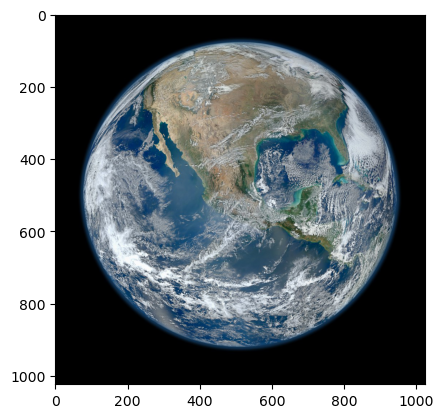

In [3]:
url = 'https://live.staticflickr.com/7151/6760135001_58b1c5c5f0_b.jpg'
image = io.imread(url)
plt.imshow(image)
plt.show()

## Convert the image to grayscale

In [4]:
bw_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

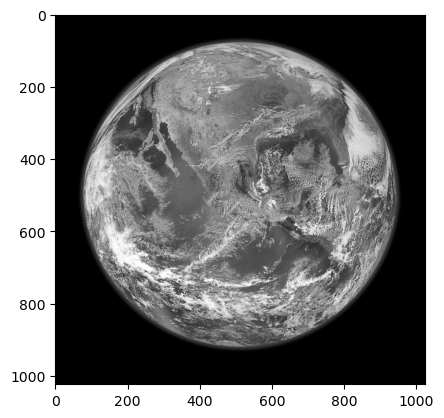

In [5]:
plt.imshow(bw_image, cmap = "gray")
plt.show()

## Plotting the histogram

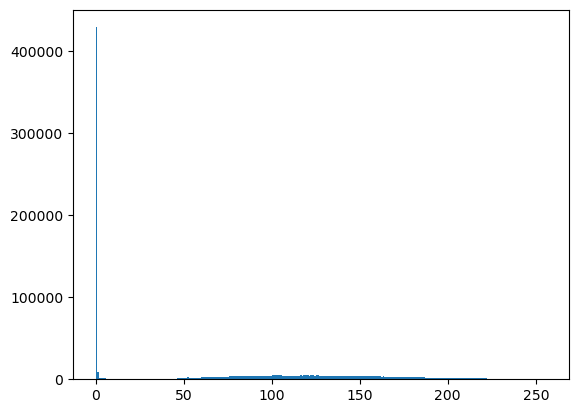

In [6]:
plt.hist(bw_image.ravel(), 256, [0, 256])
plt.show()

## Binarization with threshold = 127

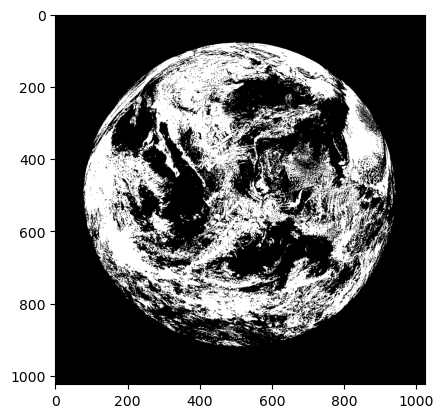

In [7]:
t1 = 255/2
image_b = (bw_image>t1) *255
plt.imshow(image_b,cmap ="gray")
plt.show()

## Task 1
You need to implement the code with binarisation to find appropriate threshold do make image binary
1. Randomly select the initial value of the threshold then
2. Segment the image by the threshold To: regions
G1 and G2 of pixels with values > Then and To
3. Calculate the average values of u1 and u2 for the regions
G1 and G2
4. T1 = 0,5 (u1 + u2)
5. Repeat until / Ti -Ti+1/< Tth

In [18]:
def binarize_thresholding(image: np.ndarray, treshold: float = 1e-6) -> tuple[np.ndarray, float]:
    trh = np.random.randint(0, 256)
    iter = 0
    while True:
        g1, g2 = bw_image[image>trh], bw_image[image<=trh]
        u1, u2 = np.mean(g1), np.mean(g2)
        ti = (u1+u2)/2

        if abs(trh - ti) < treshold:
            break
        
        trh = ti

        # plot hist every 10 iter
        plt.hist(bw_image.ravel(), 256, [0, 256])
        plt.axvline(trh, color='r')
        plt.text(trh, 100000, f'threshold: {trh}', rotation=90)
        plt.show()
    
    return np.where(image > trh, 255, 0).astype(np.uint8), trh

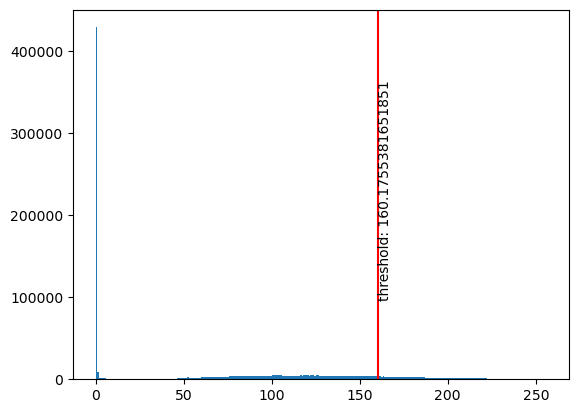

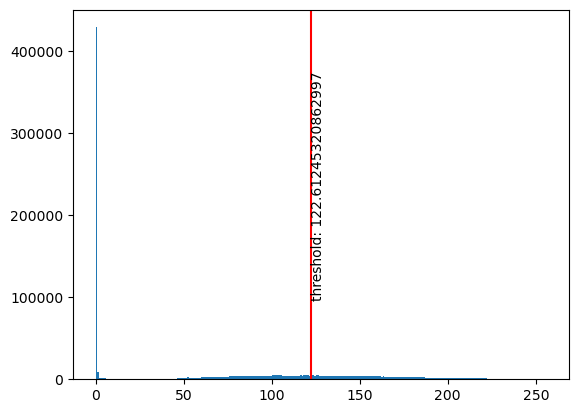

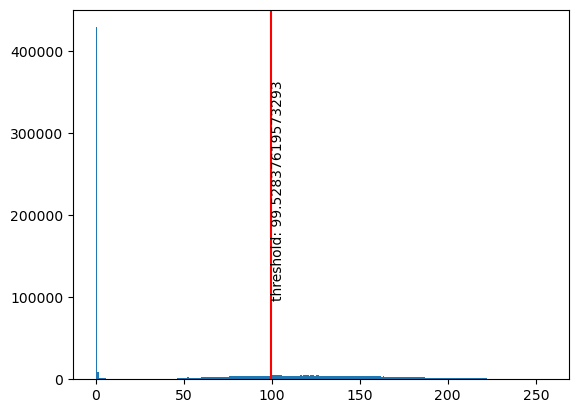

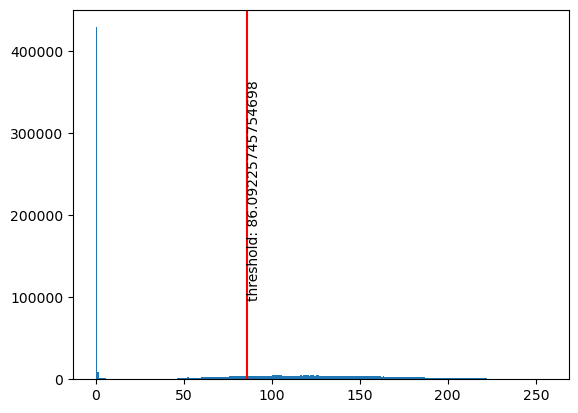

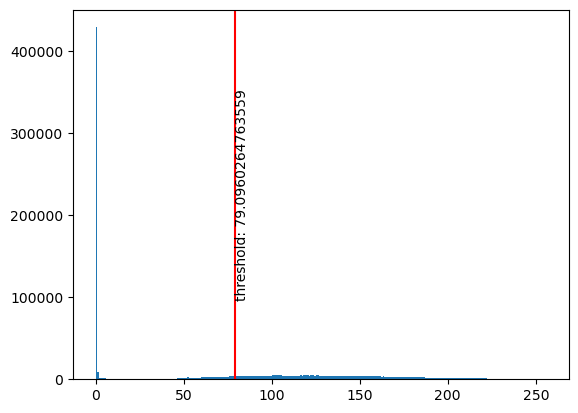

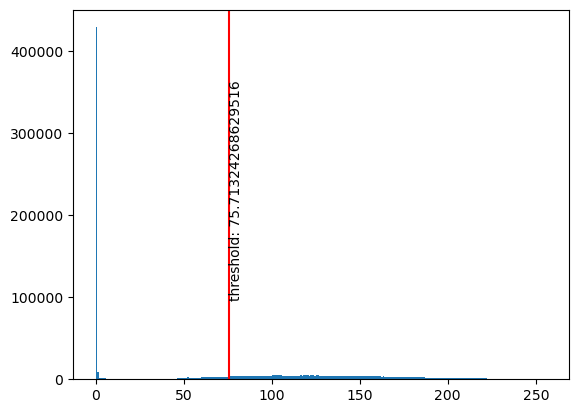

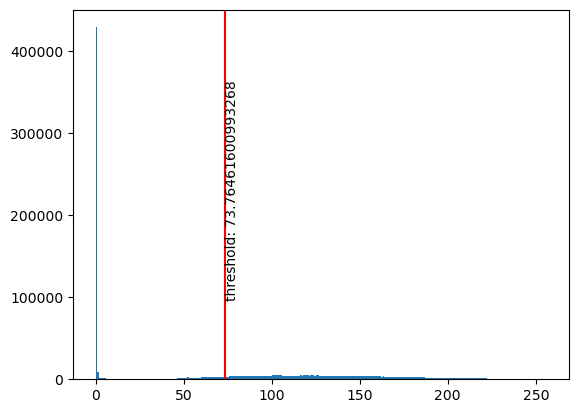

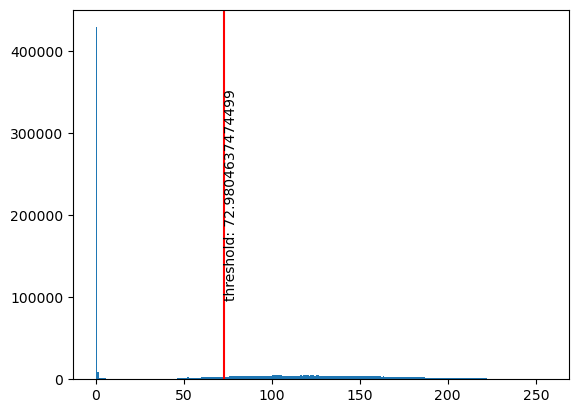

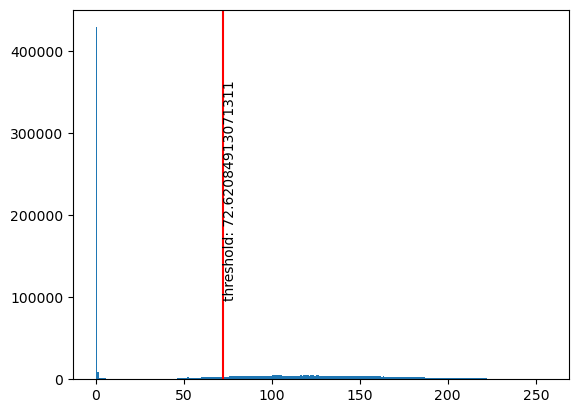

Treshold: 72.62084913071311


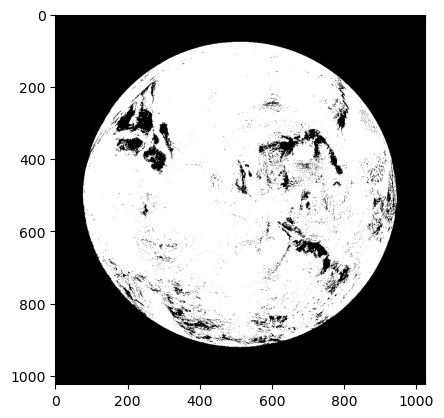

In [19]:
binary_image, treshold = binarize_thresholding(bw_image)

print("Treshold:", treshold)
plt.imshow(binary_image, cmap = "gray")
plt.show()

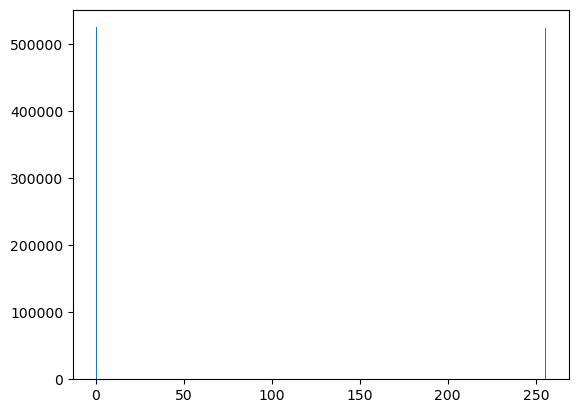

In [20]:
plt.hist(binary_image.ravel(), 256, [0, 256])
plt.show()

0 is black, 255 is white